# Procesos estocásticos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl
from scipy.signal import lfilter

TransferFunction(array([1. , 0.9]), array([1.  , 0.02]), 1)

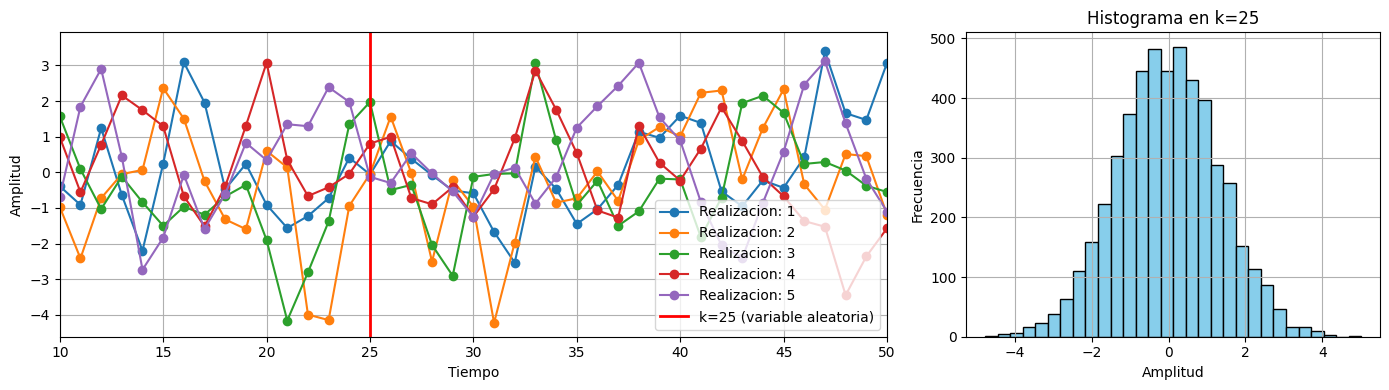

In [ ]:
# Proceso estocástico discreto dado por una gaussiana filtrada por un primer orden
N_samples = 100
N_realizations = 5000
w = np.random.randn(N_samples, N_realizations)

G = ctrl.TransferFunction([1, 0.9], [1, 0.02],1)  # Filtro de primer orden
display(G)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4), gridspec_kw={'width_ratios': [2, 1]})
for omega in range(5):
    U=w[:,omega]
    _,x = ctrl.forced_response(G,U=e[:,omega])
    ax1.plot(x,'o-',label=f"Realizacion: {omega+1}")
ax1.axvline(x=25, color='r', linestyle='-', linewidth=2, label='k=25 (variable aleatoria)')
ax1.set_xlabel('Tiempo')
ax1.set_ylabel('Amplitud')
ax1.legend()
ax1.grid()
ax1.set_xlim((10, 50))

# Histograma en k=25 para las 100 realizaciones
valores_k25 = []
for omega in range(N_realizations):
    _, x = ctrl.forced_response(G, U=e[:, omega])
    valores_k25.append(x[25])
ax2.hist(valores_k25, bins=30, color='skyblue', edgecolor='k')
ax2.set_title('Histograma en k=25')
ax2.set_xlabel('Amplitud')
ax2.set_ylabel('Frecuencia')
ax2.grid()

plt.tight_layout()
plt.show()

## Cálculo de autocorrelación y densidad espectral de potencia 

Se calcula la densidad espectral de potencia de un proceso estocástico ergódigo

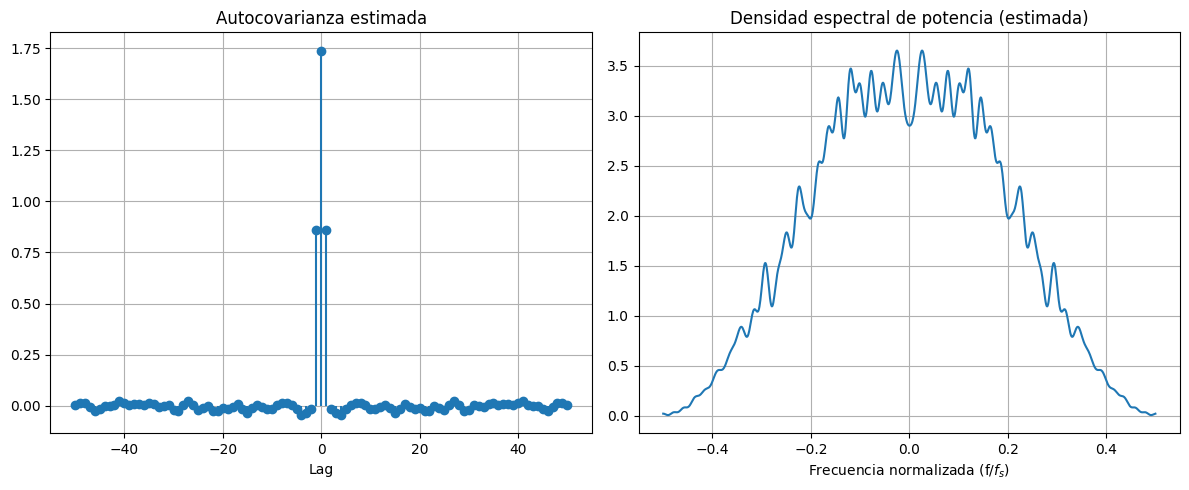

In [ ]:
# Parámetros
N = 10000  # longitud de la señal
np.random.seed(0)
w = np.random.normal(0, 1, N)

# Ahora vamos a calcular el ruido coloreado usando filtros
#p1=.9;
#x = lfilter([0, 1-p1],[p1], w)
x = lfilter([1, 0.9], [1, 0.02], w)

# Autocovarianza estimada
lags = np.arange(-50, 51)
r_x = np.correlate(x - np.mean(x), x - np.mean(x), mode='full') / N
r_x = r_x[N+lags-1]  # centrado en lag 0

# Espectro (por DFT)
S_x = np.fft.fftshift(np.fft.fft(r_x, 1024))
f = np.linspace(-0.5, 0.5, len(S_x))
S_x_mag = np.abs(S_x)

# Gráficos
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.stem( lags, r_x, basefmt=" ")
plt.title("Autocovarianza estimada")
plt.xlabel("Lag")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(f, S_x_mag)
plt.title("Densidad espectral de potencia (estimada)")
plt.xlabel("Frecuencia normalizada (f/$f_s$)")
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
%% Filtrado de Ruido Blanco
% 
%%  
clear
%%
randn('state',0);
n=10000;
e=randn(n,1);
T0=1;
p1=.9;
A1=poly([p1]);
B1=[0 (1-p1)];
S1=tf(B1,A1,T0);
y1=filter(B1,A1,e);

p2=.99;
A2=poly([p2]);
B2=[0 (1-p2)];
S2=tf(B2,A2,T0);
y2=filter(B2,A2,1*e);
%%
% 
%  Señales temporales
% 
plot([e y1 y2]);grid
axis([2000 2500 -4 4])
title(' Señales Temporales')
legend('e','y1','y2')
h = findobj(gcf,'type','line');
set(h,'linewidth',2);
%%
% 
%  Correlaciones
% 
xe=xcorr(e,'coeff');
xy1=xcorr(y1,'coeff');
xy2=xcorr(y2,'coeff');
plot([xe xy1 xy2]);grid
delta=100;
axis([n-delta n+delta -.2 1])
title('Correlaciones')
legend('e','y1','y2')
h = findobj(gcf,'type','line');
set(h,'linewidth',4);

%%
% 
%  Espectros
% 
w = logspace(-2,pi,128/4)';
pe=spa(e,[],w);
py1=spa(y1,[],w);
py2=spa(y2,[],w);
%bodeplot(pe,py1,py2);grid
bode(pe,py1,py2);grid
title('Espectros')
legend('e','y1','y2')
h = findobj(gcf,'type','line');
set(h,'linewidth',4);